In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl
import seaborn.apionly as sns
from corner import corner
from scipy.misc import logsumexp
import pcmdpy as ppy
%matplotlib inline

GPU acceleration not available, sorry
pycuda not installed.


In [2]:
sns.set_context('poster')

In [3]:
dfs = {}
for i in range(1, 15):
    try:
        dfs[i] = pd.read_csv('results/dynesty_{:d}.csv'.format(i))
    except:
        dfs[i] = pd.read_csv('results/dynesty_{:d}.csv'.format(i), compression='gzip')

In [4]:
for df in dfs.values():
    df['log_weights'] = df.logwt.values - logsumexp(df.logwt.values)
    df['weights'] = np.exp(df['log_weights'])

In [5]:
def plot_chains_tau(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=4, figsize=(8, 10), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    axes[2].plot(df.logNpix)
    axes[2].set_ylabel('log Npix')
    axes[3].plot(df.tau)
    axes[3].set_ylabel(r'$\tau$ (Gyr)')
    axes[3].set_xlabel('Iteration')
    if truths is not None:
        for i in range(4):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [6]:
def plot_chains_SSP(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=4, figsize=(8, 10), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    axes[2].plot(df.logNpix)
    axes[2].set_ylabel('log Npix')
    axes[3].plot(df.logage)
    axes[3].set_ylabel('log age (yr)')
    axes[3].set_xlabel('Iteration')
    if truths is not None:
        for i in range(4):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [7]:
def plot_chains_const(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    axes[2].plot(df.logNpix)
    axes[2].set_ylabel('log Npix')
    axes[2].set_xlabel('Iteration')
    if truths is not None:
        for i in range(3):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [8]:
def plot_chains_full(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=9, figsize=(8, 16), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    for i in range(7):
        colname = 'logSFH{:d}'.format(i)
        axes[i+2].plot(df[colname])
        axes[i+2].set_ylabel(colname)
    axes[-1].set_xlabel('Iteration')
    if truths is not None:
        for i in range(9):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [9]:
def plot_chains(df, **kwargs):
    if 'tau' in df.columns:
        return plot_chains_tau(df, **kwargs)
    elif 'logSFH0' in df.columns:
        return plot_chains_full(df, **kwargs)
    elif 'logage' in df.columns:
        return plot_chains_SSP(df, **kwargs)
    else:
        return plot_chains_const(df, **kwargs)

| Dyn Run | Nim | Npoints | Gal   | LikeMode|
|---------|-----|---------|-------|---------| 
| 1       | 256 | 50      | const | binned  | 
| 2       | 1024| 50      | const | binned  | 
| 3       | 256 | 50      | tau   | binned  | 
| 4       | 1024| 50      | tau   | binned  | 
| 5       | 256 | 50      | const | Gauss   | 
| 6       | 1024| 50      | const | Gauss   | 
| 7       | 256 | 50      | tau   | Gauss   | 
| 8       | 1024| 50      | tau   | Gauss   | 
| 9       | 256 | 200     | tau   | binned  | 
| 10      | 1024| 200     | tau   | binned  | 
| 11      | 256 | 200     | tau   | Gauss   | 
| 12      | 1024| 200     | tau   | Gauss   | 
| 13      | 256 | 50      | full  | binned  |
| 14      | 1024| 50      | full  | binned  |

In [10]:
titles = {}
titles[1] = 'Run 1 (Const, Binned, 256, 50pts)'
titles[2] = 'Run 2 (Const, Binned, 1024, 50pts)'
titles[3] = 'Run 3 (Tau, Binned, 256, 50pts)'
titles[4] = 'Run 4 (Tau, Binned, 1024, 50pts)'
titles[5] = 'Run 5 (Const, Gauss, 256, 50pts)'
titles[6] = 'Run 6 (Const, Gauss, 1024, 50pts)'
titles[7] = 'Run 7 (Tau, Gauss, 256, 50pts)'
titles[8] = 'Run 8 (Tau, Gauss, 1024, 50pts)'
titles[9] = 'Run 9 (Tau, Binned, 256, 200pts)'
titles[10] = 'Run 10 (Tau, Binned, 1024, 200pts)'
titles[11] = 'Run 11 (Tau, Gauss, 256, 200pts)'
titles[12] = 'Run 12 (Tau, Gauss, 1024, 200pts)'
titles[13] = 'Run 13 (Full, Binned, 256, 50pts)'
titles[14] = 'Run 14 (Full, Binned 1024, 50pts)'

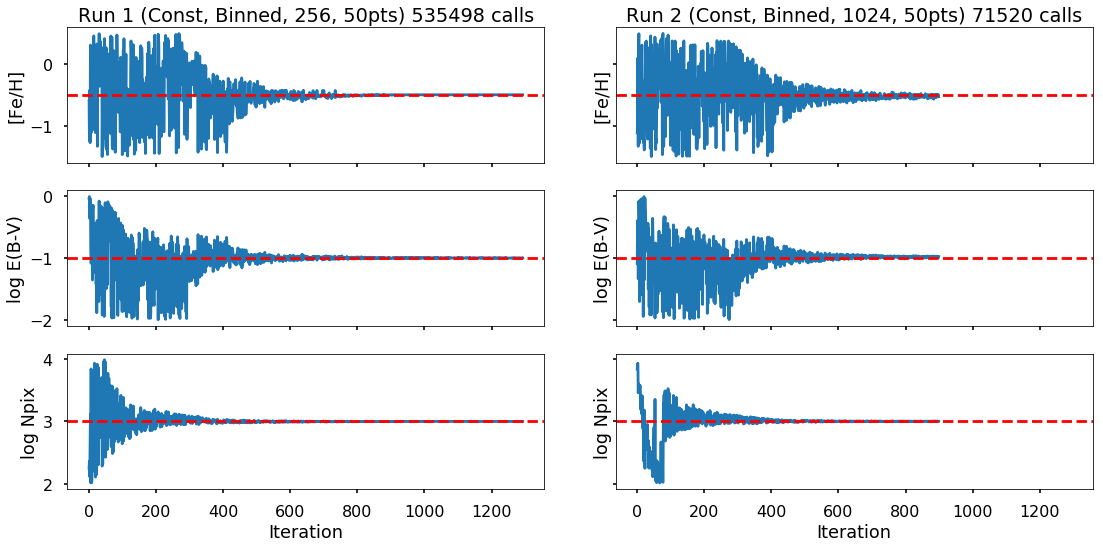

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 8), sharex=True, sharey='row')
plot_chains(dfs[1], truths=[-0.5, -1., 3.], axes=axes[:,0], title=titles[1])
plot_chains(dfs[2], truths=[-0.5, -1., 3.], axes=axes[:,1], title=titles[2])
plt.tight_layout()

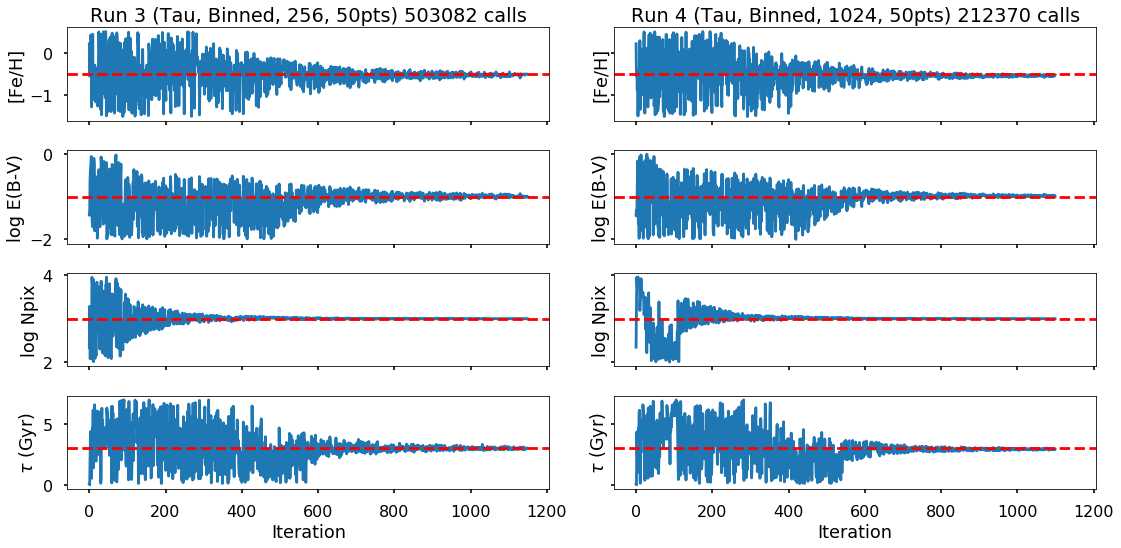

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 8), sharex=True, sharey='row')
plot_chains(dfs[3], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[3])
plot_chains(dfs[4], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[4])
plt.tight_layout()

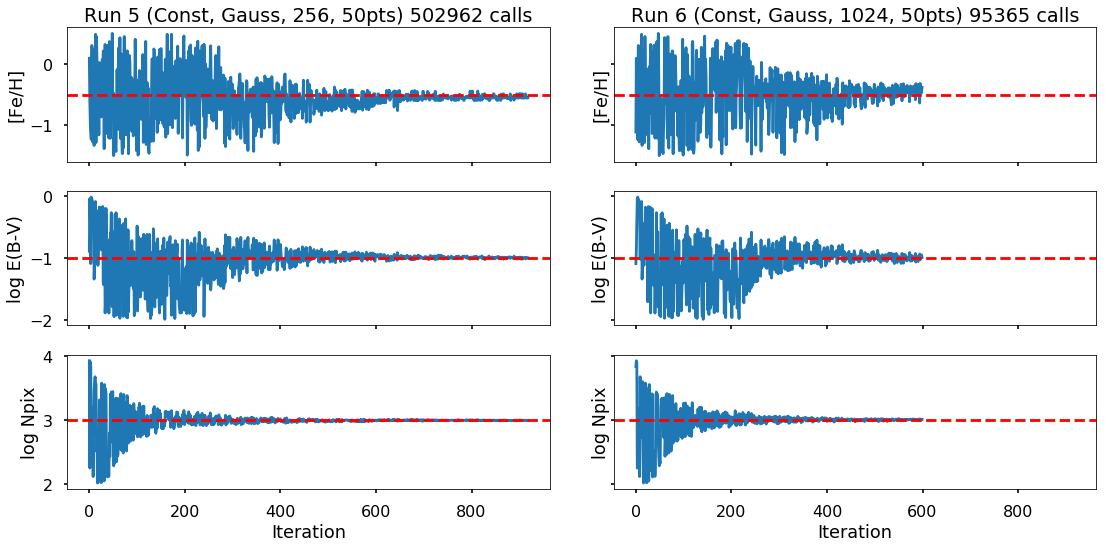

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 8), sharex=True, sharey='row')
plot_chains(dfs[5], truths=[-0.5, -1., 3.], axes=axes[:,0], title=titles[5])
plot_chains(dfs[6], truths=[-0.5, -1., 3.], axes=axes[:,1], title=titles[6])
plt.tight_layout()

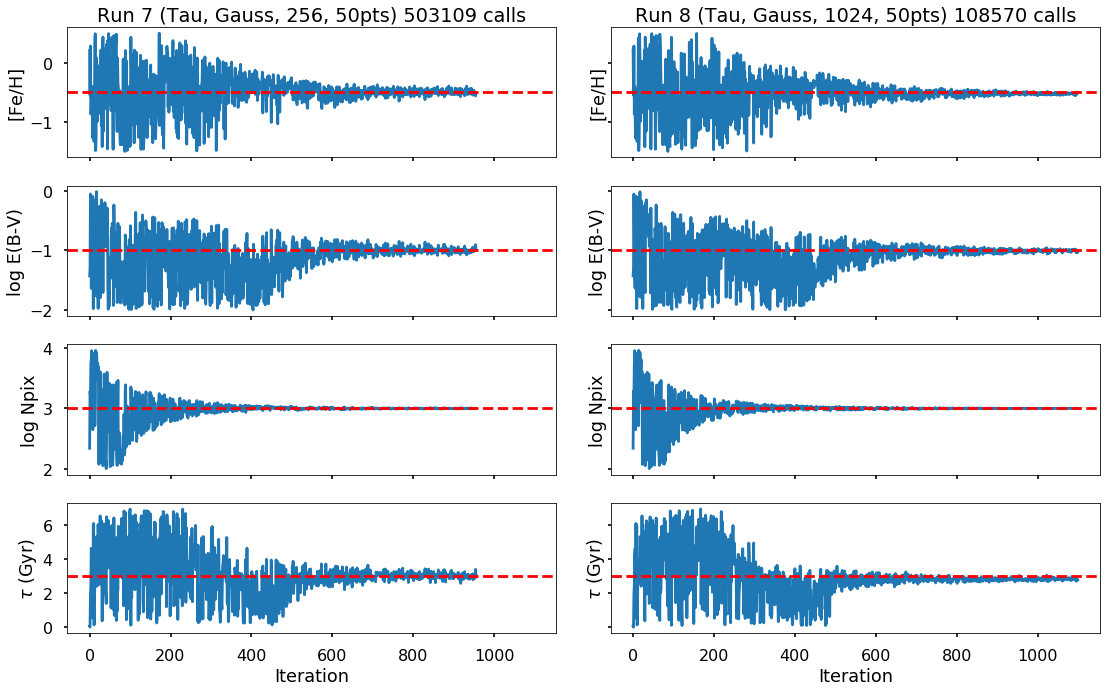

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[7], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[7])
plot_chains(dfs[8], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[8])
plt.tight_layout()

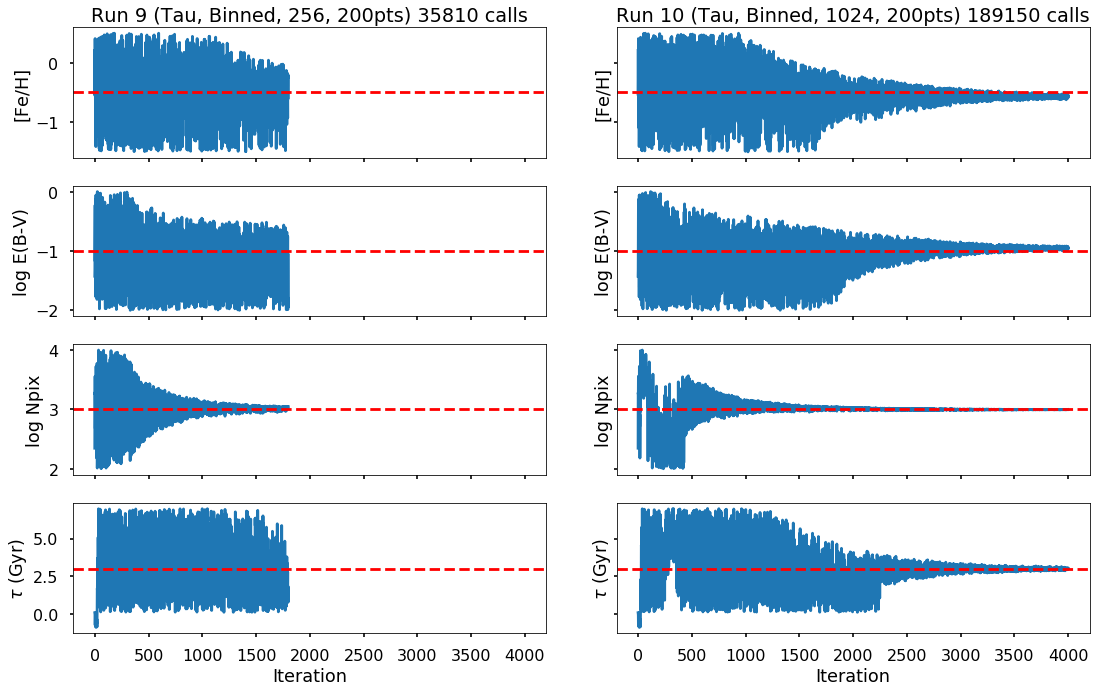

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[9], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[9])
plot_chains(dfs[10], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[10])
plt.tight_layout()

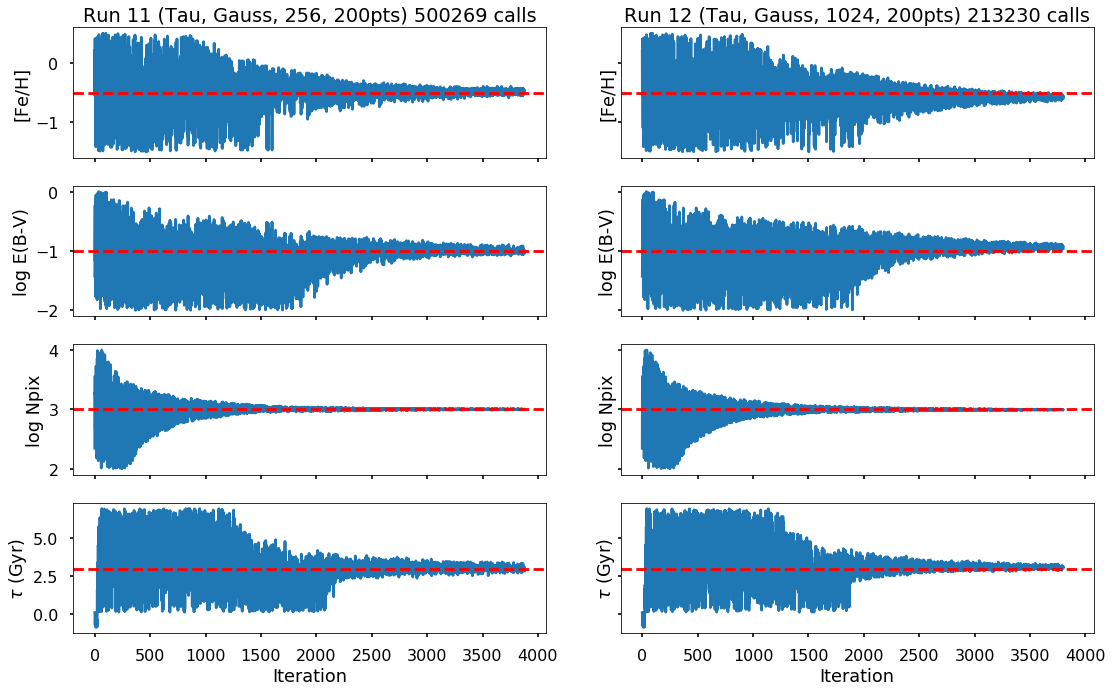

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[11], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[11])
plot_chains(dfs[12], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[12])
plt.tight_layout()

In [17]:
model = ppy.galaxy.Tau_Model(np.array([-0.5, -1., 3., 3.]))

In [18]:
params = np.append(model._params[:-2], np.log10(model.SFH))

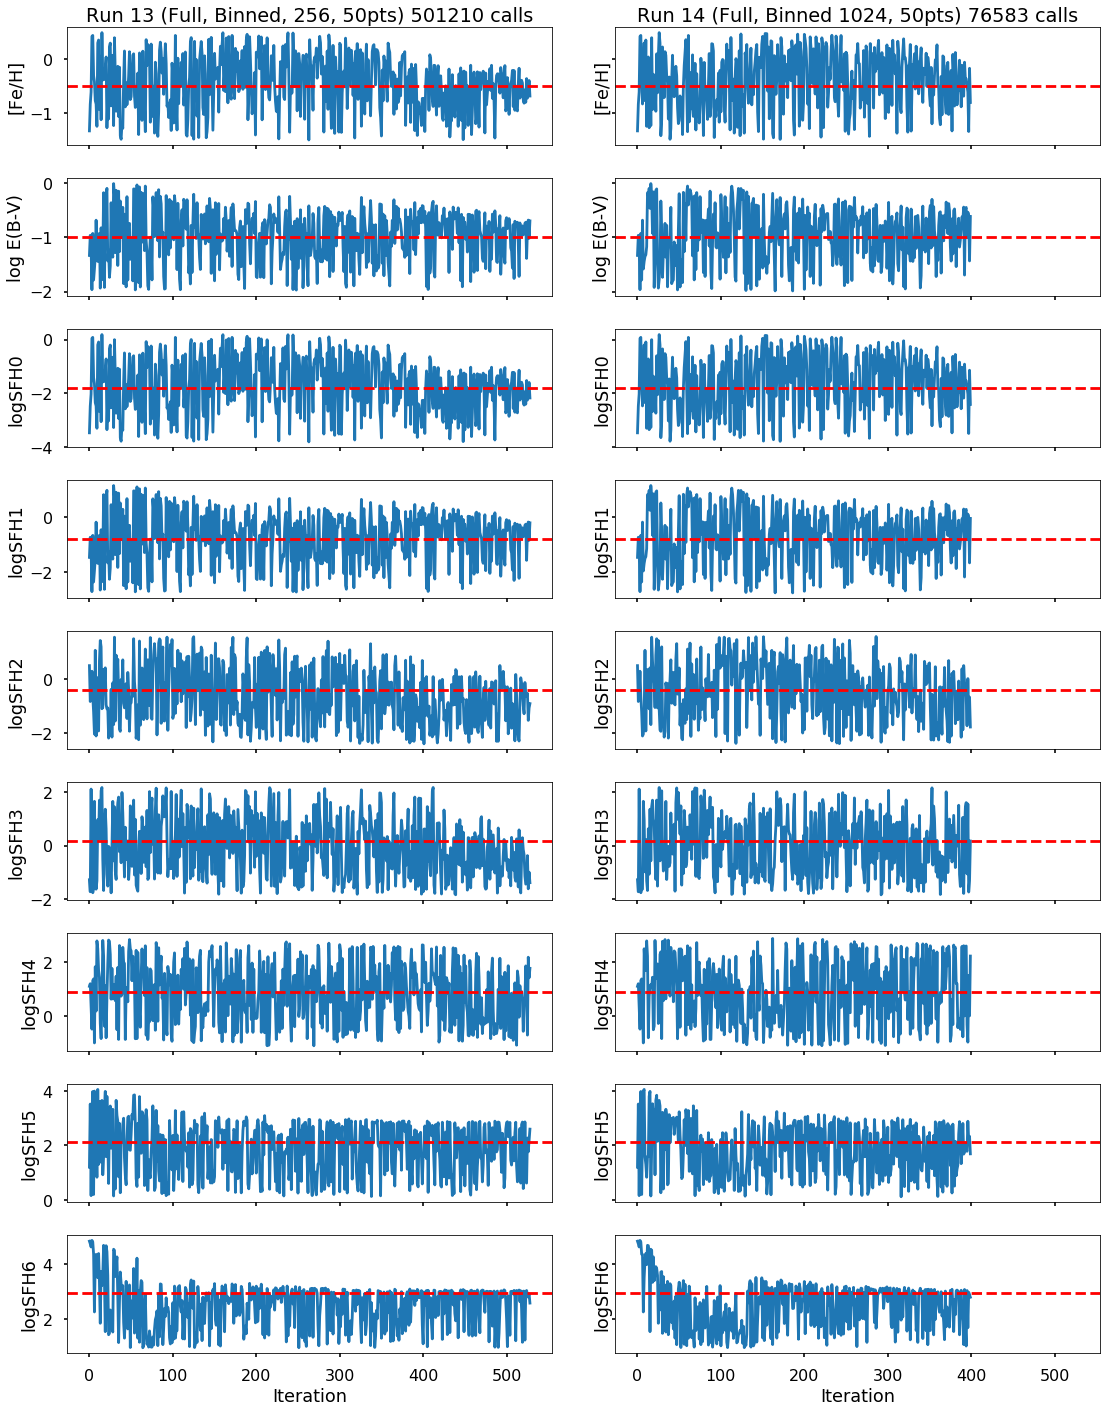

In [19]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(16, 20), sharex=True, sharey='row')
plot_chains(dfs[13], truths=params, axes=axes[:,0], title=titles[13])
plot_chains(dfs[14], truths=params, axes=axes[:,1], title=titles[14])
plt.tight_layout()

/Users/bcook/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/bcook/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


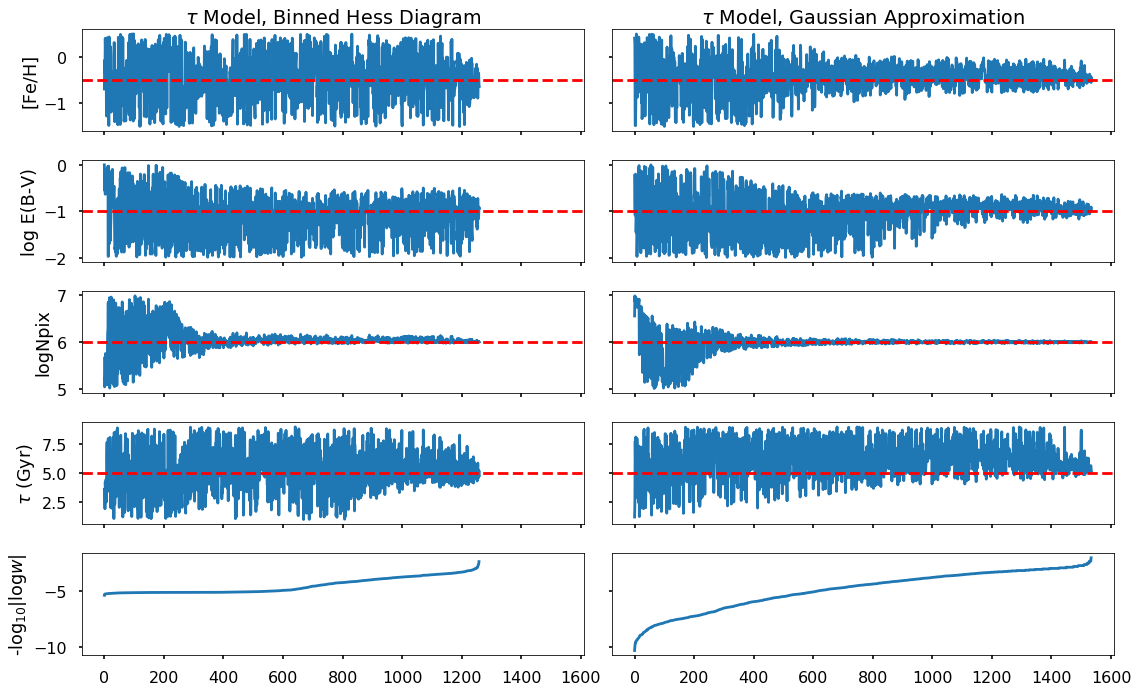

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
axes[0,0].plot(df_tau.logzh)
axes[0,0].set_ylabel('[Fe/H]')
axes[0,0].axhline(y=-0.5, color='r', ls='--')
axes[1,0].plot(df_tau.logdust)
axes[1,0].set_ylabel('log E(B-V)')
axes[1,0].axhline(y=-1, color='r', ls='--')
axes[2,0].plot(df_tau.logNpix)
axes[2,0].set_ylabel('logNpix')
axes[2,0].axhline(y=6, color='r', ls='--')
axes[3,0].plot(df_tau.tau)
axes[3,0].set_ylabel(r'$\tau$ (Gyr)')
axes[3,0].axhline(y=5, color='r', ls='--')
axes[4,0].plot(-np.log10(-df_tau.log_weights))
axes[4,0].set_ylabel(r'-$\log_{10}|\log w|$')
axes[0,0].set_title(r'$\tau$ Model, Binned Hess Diagram')

axes[0,1].plot(df_tau_g.logzh)
axes[0,1].axhline(y=-0.5, color='r', ls='--')
axes[1,1].plot(df_tau_g.logdust)
axes[1,1].axhline(y=-1, color='r', ls='--')
axes[2,1].plot(df_tau_g.logNpix)
axes[2,1].axhline(y=6, color='r', ls='--')
axes[3,1].plot(df_tau_g.tau)
axes[3,1].axhline(y=5, color='r', ls='--')
axes[4,1].plot(-np.log10(-df_tau_g.log_weights))
axes[0,1].set_title(r'$\tau$ Model, Gaussian Approximation')
plt.tight_layout()

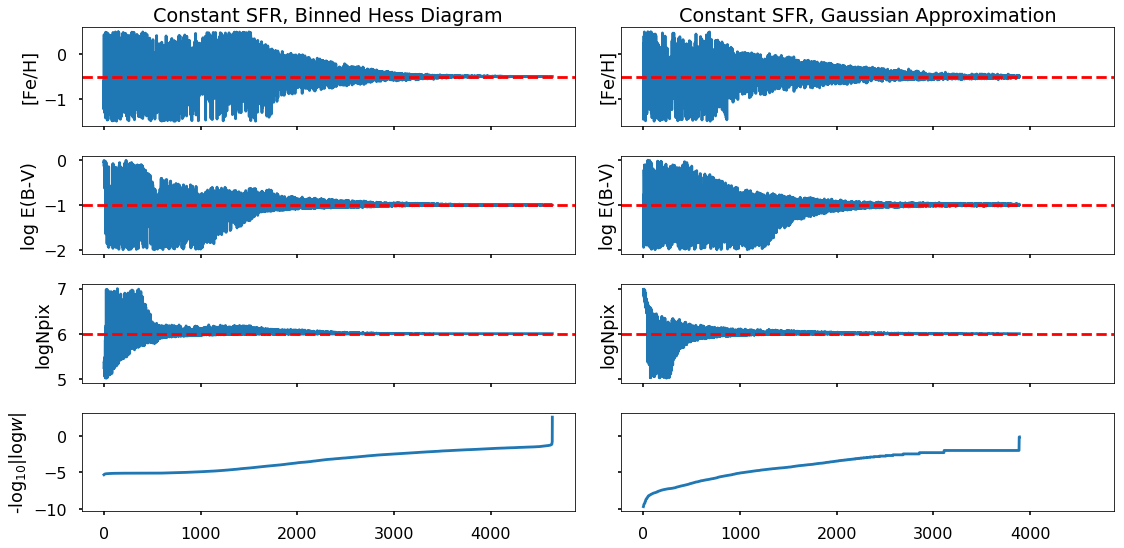

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 8), sharex=True, sharey='row')
axes[0,0].plot(df_const.logzh)
axes[0,0].set_ylabel('[Fe/H]')
axes[0,0].axhline(y=-0.5, color='r', ls='--')
axes[1,0].plot(df_const.logdust)
axes[1,0].set_ylabel('log E(B-V)')
axes[1,0].axhline(y=-1, color='r', ls='--')
axes[2,0].plot(df_const.logNpix)
axes[2,0].set_ylabel('logNpix')
axes[2,0].axhline(y=6, color='r', ls='--')
axes[3,0].plot(-np.log10(-df_const.log_weights))
axes[3,0].set_ylabel(r'-$\log_{10}|\log w|$')
axes[0,0].set_title(r'Constant SFR, Binned Hess Diagram')

axes[0,1].plot(df_const_g.logzh)
axes[0,1].set_ylabel('[Fe/H]')
axes[0,1].axhline(y=-0.5, color='r', ls='--')
axes[1,1].plot(df_const_g.logdust)
axes[1,1].set_ylabel('log E(B-V)')
axes[1,1].axhline(y=-1, color='r', ls='--')
axes[2,1].plot(df_const_g.logNpix)
axes[2,1].set_ylabel('logNpix')
axes[2,1].axhline(y=6, color='r', ls='--')
axes[3,1].plot(-np.log10(-df_const_g.log_weights))
axes[0,1].set_title(r'Constant SFR, Gaussian Approximation')
plt.tight_layout()

/Users/bcook/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


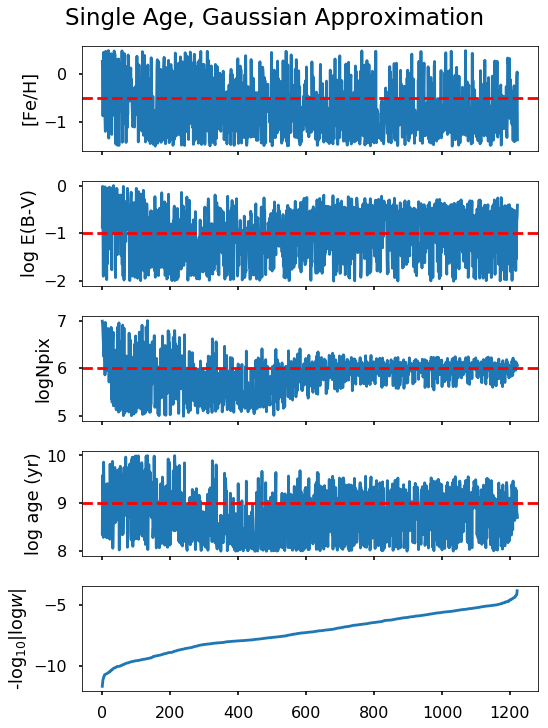

In [13]:
fig, axes = plt.subplots(nrows=5, figsize=(8, 10), sharex=True)
axes[0].plot(df_ssp.logzh)
axes[0].set_ylabel('[Fe/H]')
axes[0].axhline(y=-0.5, color='r', ls='--')
axes[1].plot(df_ssp.logdust)
axes[1].set_ylabel('log E(B-V)')
axes[1].axhline(y=-1, color='r', ls='--')
axes[2].plot(df_ssp.logNpix)
axes[2].set_ylabel('logNpix')
axes[2].axhline(y=6, color='r', ls='--')
axes[3].plot(df_ssp.logage)
axes[3].set_ylabel('log age (yr)')
axes[3].axhline(y=9.0, color='r', ls='--')
axes[4].plot(-np.log10(-df_ssp.log_weights))
axes[4].set_ylabel(r'-$\log_{10}|\log w|$')
plt.suptitle(r'Single Age, Gaussian Approximation', y=1.02)
plt.tight_layout()


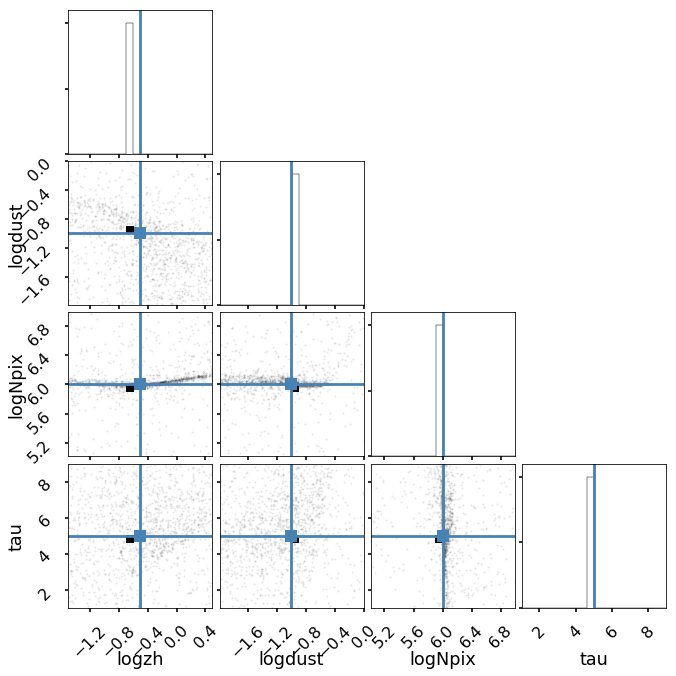

In [14]:
_ = corner(df_tau[['logzh','logdust','logNpix','tau']], weights=df_tau.weights, truths=[-0.5,-1.,6.,5.])

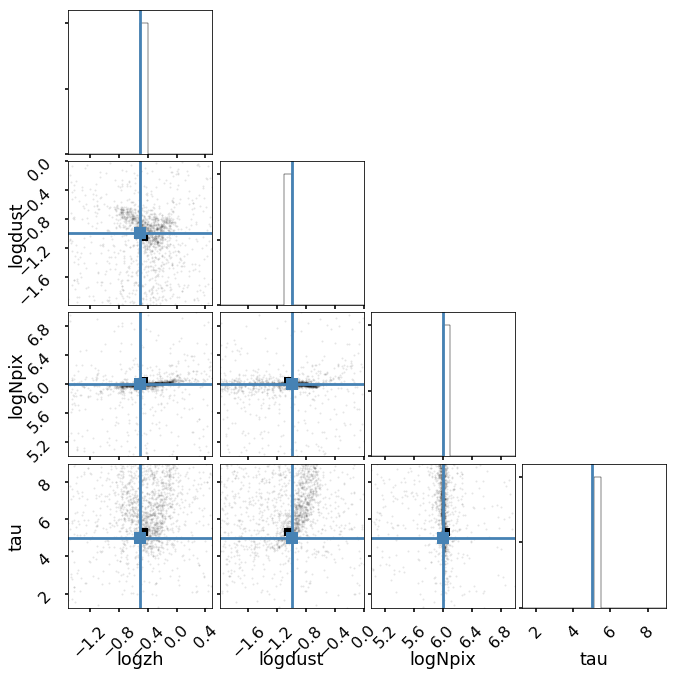

In [15]:
_ = corner(df_tau_g[['logzh','logdust','logNpix','tau']], weights=df_tau_g.weights, truths=[-0.5,-1.,6.,5.])

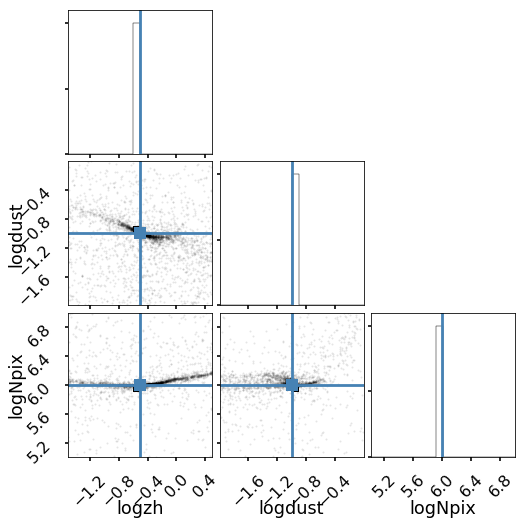

In [16]:
_ = corner(df_const[['logzh','logdust','logNpix']], weights=df_const.weights, truths=[-0.5,-1.,6.])

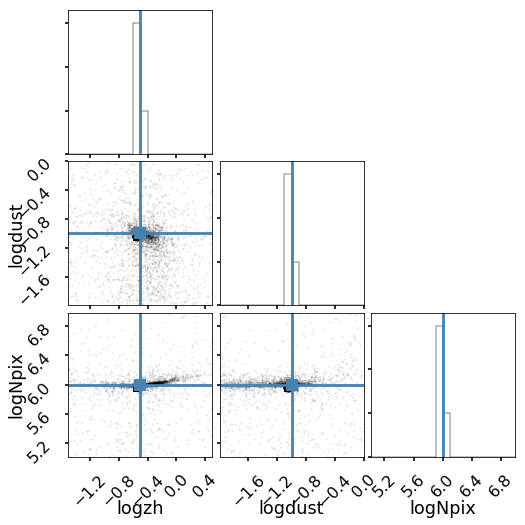

In [17]:
_ = corner(df_const_g[['logzh','logdust','logNpix']], weights=df_const_g.weights, truths=[-0.5,-1.,6.])

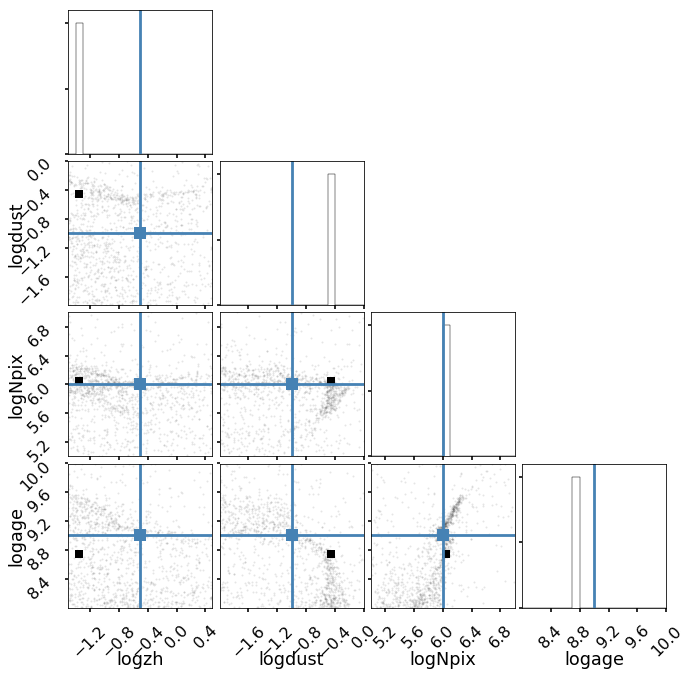

In [18]:
_ = corner(df_ssp[['logzh','logdust','logNpix', 'logage']], weights=df_ssp.weights, truths=[-0.5,-1.,6.,9.])

In [32]:
results_cols = ['nlive', 'niter', 'ncall', 'eff',
                 'logl', 'logwt','logvol', 'logz',
                 'logzerr', 'h', 'delta_logz']
out_df = pd.DataFrame(columns=results_cols, dtype=float)

In [37]:
a = out_df.niter

In [39]:
a.dtype

dtype('float64')